# Przewidywanie wyniku meczu piłkarskiego

## Przygotowanie zbioru

Zacznijmy od wczytania danych

In [94]:
import pandas as pd
import numpy as np

df = pd.read_pickle('../data/ml_data.pkl')

In [95]:
df.head()

,stage,home_team_goal,away_team_goal,league_name_Belgium Jupiler League,league_name_England Premier League,league_name_France Ligue 1,league_name_Germany 1. Bundesliga,league_name_Italy Serie A,league_name_Netherlands Eredivisie,league_name_Poland Ekstraklasa,league_name_Portugal Liga ZON Sagres,league_name_Scotland Premier League,league_name_Spain LIGA BBVA,league_name_Switzerland Super League,avg_odds_home_win,avg_odds_draw,avg_odds_away_win,home_team_buildUpPlaySpeed,home_team_buildUpPlayDribbling,home_team_buildUpPlayPassing,home_team_chanceCreationPassing,home_team_chanceCreationCrossing,home_team_chanceCreationShooting,home_team_defencePressure,home_team_defenceAggression,home_team_defenceTeamWidth,home_team_buildUpPlayPositioningClass_Free_Form,home_team_buildUpPlayPositioningClass_Organised,home_team_chanceCreationPositioningClass_Free_Form,home_team_chanceCreationPositioningClass_Organised,home_team_defenceDefenderLineClass_Cover,home_team_defenceDefenderLineClass_Offside_Trap,away_team_buildUpPlaySpeed,away_team_buildUpPlayDribbling,away_team_buildUpPlayPassing,away_team_chanceCreationPassing,away_team_chanceCreationCrossing,away_team_chanceCreationShooting,away_team_defencePressure,away_team_defenceAggression,away_team_defenceTeamWidth,away_team_buildUpPlayPositioningClass_Free_Form,away_team_buildUpPlayPositioningClass_Organised,away_team_chanceCreationPositioningClass_Free_Form,away_team_chanceCreationPositioningClass_Organised,away_team_defenceDefenderLineClass_Cover,away_team_defenceDefenderLineClass_Offside_Trap,home_player_1_height,home_player_1_weight,home_player_1_overall_rating,home_player_1_potential,home_player_1_attacking_work_rate,home_player_1_defensive_work_rate,home_player_1_crossing,home_player_1_finishing,home_player_1_heading_accuracy,home_player_1_short_passing,home_player_1_volleys,home_player_1_dribbling,home_player_1_curve,home_player_1_free_kick_accuracy,home_player_1_long_passing,home_player_1_ball_control,home_player_1_acceleration,home_player_1_sprint_speed,home_player_1_agility,home_player_1_reactions,home_player_1_balance,home_player_1_shot_power,home_player_1_jumping,home_player_1_stamina,home_player_1_strength,home_player_1_long_shots,home_player_1_aggression,home_player_1_interceptions,home_player_1_positioning,home_player_1_vision,home_player_1_penalties,home_player_1_marking,home_player_1_standing_tackle,home_player_1_sliding_tackle,home_player_1_gk_diving,home_player_1_gk_handling,home_player_1_gk_kicking,home_player_1_gk_positioning,home_player_1_gk_reflexes,home_player_1_preferred_foot_left,home_player_1_preferred_foot_right,home_player_2_height,home_player_2_weight,home_player_2_overall_rating,home_player_2_potential,home_player_2_attacking_work_rate,home_player_2_defensive_work_rate,home_player_2_crossing,home_player_2_finishing,home_player_2_heading_accuracy,home_player_2_short_passing,home_player_2_volleys,home_player_2_dribbling,home_player_2_curve,home_player_2_free_kick_accuracy,home_player_2_long_passing,home_player_2_ball_control,home_player_2_acceleration,home_player_2_sprint_speed,home_player_2_agility,home_player_2_reactions,home_player_2_balance,home_player_2_shot_power,home_player_2_jumping,home_player_2_stamina,home_player_2_strength,home_player_2_long_shots,home_player_2_aggression,home_player_2_interceptions,home_player_2_positioning,home_player_2_vision,home_player_2_penalties,home_player_2_marking,home_player_2_standing_tackle,home_player_2_sliding_tackle,home_player_2_preferred_foot_left,home_player_2_preferred_foot_right,home_player_3_height,home_player_3_weight,home_player_3_overall_rating,home_player_3_potential,home_player_3_attacking_work_rate,home_player_3_defensive_work_rate,home_player_3_crossing,home_player_3_finishing,home_player_3_heading_accuracy,home_player_3_short_passing,home_player_3_volleys,home_player_3_dribbling,home_player_3_curve,home_player_3_free_kick_accuracy,home_player_3_long_passing,home_player_3_ball_control,home_player_3_accelerati

In [96]:
def print_full(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    display(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

Popatrzmy na kolumny jakie ma nasza wczytana tabela

In [97]:
print_full(df.columns.values)

array(['stage', 'home_team_goal', 'away_team_goal',
       'league_name_Belgium Jupiler League',
       'league_name_England Premier League', 'league_name_France Ligue 1',
       'league_name_Germany 1. Bundesliga', 'league_name_Italy Serie A',
       'league_name_Netherlands Eredivisie',
       'league_name_Poland Ekstraklasa',
       'league_name_Portugal Liga ZON Sagres',
       'league_name_Scotland Premier League',
       'league_name_Spain LIGA BBVA',
       'league_name_Switzerland Super League', 'avg_odds_home_win',
       'avg_odds_draw', 'avg_odds_away_win', 'home_team_buildUpPlaySpeed',
       'home_team_buildUpPlayDribbling', 'home_team_buildUpPlayPassing',
       'home_team_chanceCreationPassing',
       'home_team_chanceCreationCrossing',
       'home_team_chanceCreationShooting', 'home_team_defencePressure',
       'home_team_defenceAggression', 'home_team_defenceTeamWidth',
       'home_team_buildUpPlayPositioningClass_Free_Form',
       'home_team_buildUpPlayPositionin

Nasze dane składają się z:
- kolejka rozgrywania meczu,
- liczba strzelonych goli przez drużynę grającą u siebie
- liczba strzelonych goli przez drużynę grającą na wyjeździe
- liga rozgrywania meczu (one hot encoding)
- średnie kursy bukmacherów
- statystki drużyny z gry FIFA (0-100),
- statystyki piłkarz z gry FIFA (0-100)
- data rozegrania meczu (miesiąc, rok)

Jako, że chcemy przewidywać, która drużyna wygra lub czy będzie remis musimy zmienić kolumny z golami strzelonymi przez drużyny na one hot encoding

In [98]:
df["result"] = df.apply(lambda r: (-1 if r["home_team_goal"] > r["away_team_goal"] else 1 if r["home_team_goal"] < r["away_team_goal"] else 0), axis=1)

In [99]:
df['result']

0       -1
1        0
2        1
3        0
4        1
        ..
19607   -1
19608   -1
19609    0
19610   -1
19611   -1
Name: result, Length: 19612, dtype: int64

In [100]:
df['home_team_goal']

0        2
1        2
2        0
3        2
4        0
        ..
19607    4
19608    3
19609    1
19610    2
19611    2
Name: home_team_goal, Length: 19612, dtype: int64

In [101]:
df['away_team_goal']

0        1
1        2
2        2
3        2
4        1
        ..
19607    0
19608    0
19609    1
19610    0
19611    0
Name: away_team_goal, Length: 19612, dtype: int64

In [102]:
df = pd.get_dummies(df, columns=['result'])

In [103]:
df

,stage,home_team_goal,away_team_goal,league_name_Belgium Jupiler League,league_name_England Premier League,league_name_France Ligue 1,league_name_Germany 1. Bundesliga,league_name_Italy Serie A,league_name_Netherlands Eredivisie,league_name_Poland Ekstraklasa,...,away_player_7_age,away_player_8_age,away_player_9_age,away_player_10_age,away_player_11_age,month,year,result_-1,result_0,result_1
0,24,2,1,1,0,0,0,0,0,0,...,23,27,27,26,19,2,2009,1,0,0
1,22,2,2,1,0,0,0,0,0,0,...,22,19,29,23,21,12,2010,0,1,0
2,8,0,2,1,0,0,0,0,0,0,...,22,20,19,22,21,9,2010,0,0,1
3,6,2,2,1,0,0,0,0,0,0,...,25,22,19,22,21,9,2010,0,1,0
4,30,0,1,1,0,0,0,0,0,0,...,23,25,19,23,21,3,2011,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19607,28,4,0,0,0,0,1,0,0,0,...,26,32,29,26,29,4,2009,1,0,0
19608,12,3,0,0,0,0,1,0,0,0,...,30,27,31,25,28,11,2008,1,0,0
19609,20,1,1,0,0,0,1,0,0,0,...,30,29,32,25,29,2,2009,0,1,0
19610,18,2,0,0,0,0,1,0,0,0,...,30,27,32,27,29,1,2009,1,0,0


In [104]:
df = df.drop(["home_team_goal", "away_team_goal"], axis=1)

In [105]:
df = df.rename(columns={"result_-1": "win", "result_0": "draw", "result_1": "lost"})

In [106]:
df

,stage,league_name_Belgium Jupiler League,league_name_England Premier League,league_name_France Ligue 1,league_name_Germany 1. Bundesliga,league_name_Italy Serie A,league_name_Netherlands Eredivisie,league_name_Poland Ekstraklasa,league_name_Portugal Liga ZON Sagres,league_name_Scotland Premier League,...,away_player_7_age,away_player_8_age,away_player_9_age,away_player_10_age,away_player_11_age,month,year,win,draw,lost
0,24,1,0,0,0,0,0,0,0,0,...,23,27,27,26,19,2,2009,1,0,0
1,22,1,0,0,0,0,0,0,0,0,...,22,19,29,23,21,12,2010,0,1,0
2,8,1,0,0,0,0,0,0,0,0,...,22,20,19,22,21,9,2010,0,0,1
3,6,1,0,0,0,0,0,0,0,0,...,25,22,19,22,21,9,2010,0,1,0
4,30,1,0,0,0,0,0,0,0,0,...,23,25,19,23,21,3,2011,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19607,28,0,0,0,1,0,0,0,0,0,...,26,32,29,26,29,4,2009,1,0,0
19608,12,0,0,0,1,0,0,0,0,0,...,30,27,31,25,28,11,2008,1,0,0
19609,20,0,0,0,1,0,0,0,0,0,...,30,29,32,25,29,2,2009,0,1,0
19610,18,0,0,0,1,0,0,0,0,0,...,30,27,32,27,29,1,2009,1,0,0


Popatrzmy jeszcze raz na kolumny jakie teraz mamy. Widzimy, że w zbiorze są kolumny na temat zakładów u bukmachera. Pozbędziemy się ich, ponieważ mogę wpływać na naszą sieć, a my chcemy przewidywać wyniki meczy na podstawie czynników, które mają na nie wpływ.

In [107]:
print_full(df.columns.values)

array(['stage', 'league_name_Belgium Jupiler League',
       'league_name_England Premier League', 'league_name_France Ligue 1',
       'league_name_Germany 1. Bundesliga', 'league_name_Italy Serie A',
       'league_name_Netherlands Eredivisie',
       'league_name_Poland Ekstraklasa',
       'league_name_Portugal Liga ZON Sagres',
       'league_name_Scotland Premier League',
       'league_name_Spain LIGA BBVA',
       'league_name_Switzerland Super League', 'avg_odds_home_win',
       'avg_odds_draw', 'avg_odds_away_win', 'home_team_buildUpPlaySpeed',
       'home_team_buildUpPlayDribbling', 'home_team_buildUpPlayPassing',
       'home_team_chanceCreationPassing',
       'home_team_chanceCreationCrossing',
       'home_team_chanceCreationShooting', 'home_team_defencePressure',
       'home_team_defenceAggression', 'home_team_defenceTeamWidth',
       'home_team_buildUpPlayPositioningClass_Free_Form',
       'home_team_buildUpPlayPositioningClass_Organised',
       'home_team_chance

In [108]:
df = df.drop(["avg_odds_home_win", "avg_odds_draw", "avg_odds_away_win", "month", "year"], axis=1)

In [109]:
df.describe()

,stage,league_name_Belgium Jupiler League,league_name_England Premier League,league_name_France Ligue 1,league_name_Germany 1. Bundesliga,league_name_Italy Serie A,league_name_Netherlands Eredivisie,league_name_Poland Ekstraklasa,league_name_Portugal Liga ZON Sagres,league_name_Scotland Premier League,...,away_player_5_age,away_player_6_age,away_player_7_age,away_player_8_age,away_player_9_age,away_player_10_age,away_player_11_age,win,draw,lost
count,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000,19612.0,19612.000000,19612.000000,...,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000
mean,18.650520,0.060983,0.151030,0.145880,0.121099,0.139914,0.103610,0.0,0.060932,0.078574,...,25.825668,26.062819,26.254130,25.536253,25.316235,25.596574,25.703447,0.459056,0.252549,0.288395
std,10.513613,0.239305,0.358087,0.352995,0.326251,0.346907,0.304762,0.0,0.239212,0.269080,...,3.821464,3.947676,3.974213,3.783744,3.818846,3.818628,3.828545,0.498333,0.434486,0.453027
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,23.000000,23.000000,23.000000,23.000000,22.000000,23.000000,23.000000,0.000000,0.000000,0.000000
50%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,26.000000,26.000000,26.000000,25.000000,25.000000,25.000000,25.000000,0.000000,0.000000,0.000000
75%,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,28.000000,29.000000,29.000000,28.000000,28.000000,28.000000,28.000000,1.000000,1.000000,1.000000
max,38.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,40.000000,40.000000,40.000000,39.000000,40.000000,39.000000,38.000000,1.000000,1.000000,1.000000


Nasze dane składają się z:
- kolejka
- liga, w której rozgrywany jest mecz. Największa ilość meczy jest z ligi angielskiej i francuskiej, zaraz za nimi są liga hiszpańska i niemiecka. Ta informacja jest nam potrzebna
- kolejne kolumny to statystyki z gry FIFA drużyn i zawodników. Są to najważniejsze statystyki, od których na pewno zależy wynik meczu
- wiek zawodników. Według nas ma wpływ na wynik meczu dlatego uwzględnimy go w trenowaniu sieci
- rezultat meczu jako one hot encoding, gdzie win oznacza zwycięstwo drużyny, która gra u siebie. Analogicznie lost

### Skalowanie danych
Zanim przystąpimy do treningu naszej sieci przeskalujmy nasze dane do zakresu [0-1]. Kolumny jakie musimy przeskalować to:
- numer kolejki. Maksymalna liczba kolejek w lidze to 38, więc przeskalowanie będzie polegało na podzieleniu przez 38.
- statystyki drużyn: buildUpPlaySpeed, buildUpPlayDribbling, buildUpPlayPassing, chanceCreationPassing, chanceCreationCrossing, chanceCreationShooting, defencePressure, defenceAggression, defenceTeamWidth. Są to atrybuty gry z FIFA, więc ich zakres to 0-100, więc wystarczy podzielić wartości przez 100.
- atrybuty piłkarzy: overall_rating, potential, attacking_work_rate, defensive_work_rate, crossing, finishing, heading_accuracy, short_passing, volleys, dribbling, curve, free_kick_accuracy, long_passing, ball_control, acceleration, sprint_speed, agility, reactions, balance, shot_power, jumping, stamina, strength, long_shots, aggression, interceptions, positioning, vision, penalties, marking, standing_tackle, sliding_tackle, gk_diving, gk_handling, gk_kicking, gk_positioning, gk_reflexes. One również zawierają się w przedziale 0-100
- wzrost i waga piłkarzy. Podzielimy przez max wartość


In [110]:
df['stage'] = df['stage'] / 38

In [111]:
teams_attributes = [x for x in df.columns.values if (x.startswith('home_team') or x.startswith('away_team')) and not(x.endswith('Cover')) and not(x.endswith('Offside_Trap')) and not(x.endswith('Free_Form')) and not(x.endswith('_Organised'))]

In [112]:
teams_attributes

['home_team_buildUpPlaySpeed',
 'home_team_buildUpPlayDribbling',
 'home_team_buildUpPlayPassing',
 'home_team_chanceCreationPassing',
 'home_team_chanceCreationCrossing',
 'home_team_chanceCreationShooting',
 'home_team_defencePressure',
 'home_team_defenceAggression',
 'home_team_defenceTeamWidth',
 'away_team_buildUpPlaySpeed',
 'away_team_buildUpPlayDribbling',
 'away_team_buildUpPlayPassing',
 'away_team_chanceCreationPassing',
 'away_team_chanceCreationCrossing',
 'away_team_chanceCreationShooting',
 'away_team_defencePressure',
 'away_team_defenceAggression',
 'away_team_defenceTeamWidth']

In [113]:
players_attributes = [x for x in df.columns.values if (x.startswith('home_player') or x.startswith('away_player')) and not(x.endswith("_height")) and not(x.endswith("_weight")) and not(x.endswith("_preferred_foot_left")) and not(x.endswith("_preferred_foot_right")) and not(x.endswith("_age"))]

In [114]:
players_attributes

['home_player_1_overall_rating',
 'home_player_1_potential',
 'home_player_1_attacking_work_rate',
 'home_player_1_defensive_work_rate',
 'home_player_1_crossing',
 'home_player_1_finishing',
 'home_player_1_heading_accuracy',
 'home_player_1_short_passing',
 'home_player_1_volleys',
 'home_player_1_dribbling',
 'home_player_1_curve',
 'home_player_1_free_kick_accuracy',
 'home_player_1_long_passing',
 'home_player_1_ball_control',
 'home_player_1_acceleration',
 'home_player_1_sprint_speed',
 'home_player_1_agility',
 'home_player_1_reactions',
 'home_player_1_balance',
 'home_player_1_shot_power',
 'home_player_1_jumping',
 'home_player_1_stamina',
 'home_player_1_strength',
 'home_player_1_long_shots',
 'home_player_1_aggression',
 'home_player_1_interceptions',
 'home_player_1_positioning',
 'home_player_1_vision',
 'home_player_1_penalties',
 'home_player_1_marking',
 'home_player_1_standing_tackle',
 'home_player_1_sliding_tackle',
 'home_player_1_gk_diving',
 'home_player_1_gk_h

In [115]:
height_weight_age = [x for x in df.columns.values if x.endswith('height') or x.endswith('weight') or x.endswith('_age')]

In [116]:
height_weight_age

['home_player_1_height',
 'home_player_1_weight',
 'home_player_2_height',
 'home_player_2_weight',
 'home_player_3_height',
 'home_player_3_weight',
 'home_player_4_height',
 'home_player_4_weight',
 'home_player_5_height',
 'home_player_5_weight',
 'home_player_6_height',
 'home_player_6_weight',
 'home_player_7_height',
 'home_player_7_weight',
 'home_player_8_height',
 'home_player_8_weight',
 'home_player_9_height',
 'home_player_9_weight',
 'home_player_10_height',
 'home_player_10_weight',
 'home_player_11_height',
 'home_player_11_weight',
 'away_player_1_height',
 'away_player_1_weight',
 'away_player_2_height',
 'away_player_2_weight',
 'away_player_3_height',
 'away_player_3_weight',
 'away_player_4_height',
 'away_player_4_weight',
 'away_player_5_height',
 'away_player_5_weight',
 'away_player_6_height',
 'away_player_6_weight',
 'away_player_7_height',
 'away_player_7_weight',
 'away_player_8_height',
 'away_player_8_weight',
 'away_player_9_height',
 'away_player_9_weigh

In [117]:
df[teams_attributes] = df[teams_attributes] / 100

In [118]:
df[players_attributes] = df[players_attributes] / 100

In [119]:
df[height_weight_age] = df[height_weight_age] / df[height_weight_age].max()

In [120]:
df.describe()

,stage,league_name_Belgium Jupiler League,league_name_England Premier League,league_name_France Ligue 1,league_name_Germany 1. Bundesliga,league_name_Italy Serie A,league_name_Netherlands Eredivisie,league_name_Poland Ekstraklasa,league_name_Portugal Liga ZON Sagres,league_name_Scotland Premier League,...,away_player_5_age,away_player_6_age,away_player_7_age,away_player_8_age,away_player_9_age,away_player_10_age,away_player_11_age,win,draw,lost
count,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000,19612.0,19612.000000,19612.000000,...,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000,19612.000000
mean,0.490803,0.060983,0.151030,0.145880,0.121099,0.139914,0.103610,0.0,0.060932,0.078574,...,0.645642,0.651570,0.656353,0.654776,0.632906,0.656322,0.676406,0.459056,0.252549,0.288395
std,0.276674,0.239305,0.358087,0.352995,0.326251,0.346907,0.304762,0.0,0.239212,0.269080,...,0.095537,0.098692,0.099355,0.097019,0.095471,0.097914,0.100751,0.498333,0.434486,0.453027
min,0.026316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.400000,0.400000,0.400000,0.410256,0.400000,0.410256,0.421053,0.000000,0.000000,0.000000
25%,0.263158,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.575000,0.575000,0.575000,0.589744,0.550000,0.589744,0.605263,0.000000,0.000000,0.000000
50%,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.650000,0.650000,0.650000,0.641026,0.625000,0.641026,0.657895,0.000000,0.000000,0.000000
75%,0.736842,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.700000,0.725000,0.725000,0.717949,0.700000,0.717949,0.736842,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Wstępny model
Przewidywanie modelu możemy potraktować jako zadanie klasyfikacji wieloklasowej. W tym przypadku mecz możemy przyporządkować do jednej z 3 klas: wygrany, zremisowany, przegrany. Na wynik patrzymy okiem drużyny grającej u siebie. Na początek zaczniemy od najprostszej sieci składającej się z 4 warstw. Zanim ją zbudujemy, utwórzmy zbiór X i y.

In [158]:
input_shape = len(df.columns.values) - 3 
X = df.iloc[:, :-3]
y = df.iloc[:, -3:]
input_shape

866

In [181]:
import tensorflow as tf
import keras
from keras import models
from keras import layers

num_classes = 3


model1 = models.Sequential()
model1.add(layers.Dense(1024, activation='relu', input_shape=(len(df.columns.values) - 3,)))
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(3, activation='softmax'))

model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 1024)              887808    
                                                                 
 dense_17 (Dense)            (None, 512)               524800    
                                                                 
 dense_18 (Dense)            (None, 256)               131328    
                                                                 
 dense_19 (Dense)            (None, 3)                 771       
                                                                 
Total params: 1,544,707
Trainable params: 1,544,707
Non-trainable params: 0
_________________________________________________________________


Zamiast używać `binary_crossentropy`, użyjemy `categorical_crossentropy`, która mierzy odległość między dwoma rozkładami prawdopodobieństwa:
* wynikiem rozkładu prawdopodobieństwa naszej sieci oraz
* prawdziwą dystrybucją etykiet.

Minimalizując odległość między tymi dwoma rozkładami, uczymy nasz model, aby wyprowadzał coś jak najbardziej zbliżonego do prawdziwych etykiet (co nazywamy prawdą fundamentalną (ground truth)).

Jako metrykę użyjemy accuracy

In [182]:
model1.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Podzielmy nasz zbiór na zbiór uczący i testowy w stosunku 80% do 20%. Następnie ze zbioru uczącego weźmiemy 20% jako zbiór walidacyjny

In [183]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Teraz wytrenujmy nasz model dla 1000 epok:

In [184]:
epochs = 100        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_split=0.2)

Epoch 1/100
99/99 [==============================] - 1s 8ms/step - loss: 1.0951 - accuracy: 0.4594 - val_loss: 1.0787 - val_accuracy: 0.4583
Epoch 2/100
99/99 [==============================] - 0s 4ms/step - loss: 1.0212 - accuracy: 0.4999 - val_loss: 1.0025 - val_accuracy: 0.5057
Epoch 3/100
99/99 [==============================] - 0s 4ms/step - loss: 0.9995 - accuracy: 0.5142 - val_loss: 1.0316 - val_accuracy: 0.4911
Epoch 4/100
99/99 [==============================] - 0s 4ms/step - loss: 0.9964 - accuracy: 0.5193 - val_loss: 1.0673 - val_accuracy: 0.4949
Epoch 5/100
99/99 [==============================] - 0s 4ms/step - loss: 0.9940 - accuracy: 0.5206 - val_loss: 1.0540 - val_accuracy: 0.4646
Epoch 6/100
99/99 [==============================] - 0s 4ms/step - loss: 0.9960 - accuracy: 0.5163 - val_loss: 0.9911 - val_accuracy: 0.5188
Epoch 7/100
99/99 [==============================] - 0s 4ms/step - loss: 0.9773 - accuracy: 0.5361 - val_loss: 0.9863 - val_accuracy: 0.5207
Epoch 8/100
9

Epoch 59/100
99/99 [==============================] - 0s 4ms/step - loss: 0.9540 - accuracy: 0.5442 - val_loss: 0.9683 - val_accuracy: 0.5408
Epoch 60/100
99/99 [==============================] - 1s 5ms/step - loss: 0.9538 - accuracy: 0.5451 - val_loss: 0.9713 - val_accuracy: 0.5389
Epoch 61/100
99/99 [==============================] - 1s 7ms/step - loss: 0.9441 - accuracy: 0.5507 - val_loss: 0.9708 - val_accuracy: 0.5402
Epoch 62/100
99/99 [==============================] - 1s 6ms/step - loss: 0.9497 - accuracy: 0.5459 - val_loss: 0.9717 - val_accuracy: 0.5360
Epoch 63/100
99/99 [==============================] - 0s 4ms/step - loss: 0.9448 - accuracy: 0.5478 - val_loss: 0.9905 - val_accuracy: 0.5398
Epoch 64/100
99/99 [==============================] - 0s 4ms/step - loss: 0.9455 - accuracy: 0.5479 - val_loss: 0.9903 - val_accuracy: 0.5379
Epoch 65/100
99/99 [==============================] - 0s 4ms/step - loss: 0.9419 - accuracy: 0.5525 - val_loss: 0.9764 - val_accuracy: 0.5366
Epoch 

In [185]:
test_loss, test_acc = model1.evaluate(X_test, y_test)

123/123 [==============================] - 0s 2ms/step - loss: 1.0092 - accuracy: 0.5088


Przygotujmy sobie funkcje, które przydadzą nam się w dalszych praca. Chodzi o wykres porównujący loss i accuracy.

In [186]:
import matplotlib.pyplot as plt

In [187]:
def PlotLossComparison(loss1, val_loss1):
    plt.clf()
    epochs = range(len(loss1))
    plt.plot(epochs, loss1, 'bo', label='Training loss 1')
    plt.plot(epochs, val_loss1, 'b', label='Validation loss 1')
    plt.title('Training and validation loss comparison')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [192]:
def PlotAccuracyComparison(acc1, val_acc1):
    plt.clf()
    epochs = range(len(acc1))
    plt.plot(epochs, acc1, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc1, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

Pokażmy wykresy strat (loss) i dokładności (accuracy):

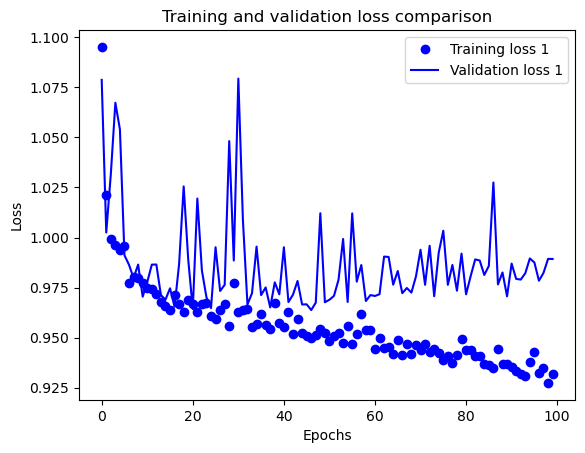

In [189]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']

PlotLossComparison(loss1, val_loss1)

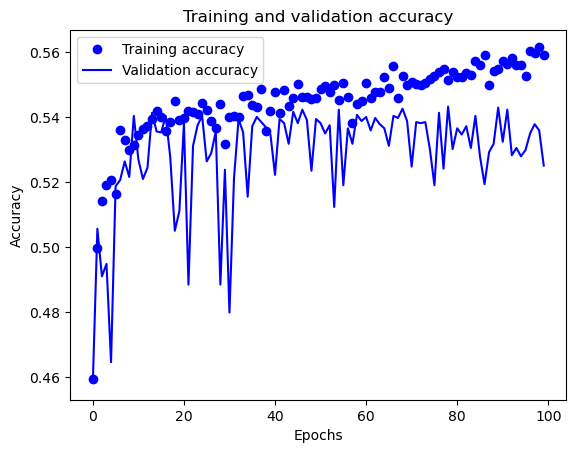

In [193]:
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotAccuracyComparison(acc1, val_acc1)

Nasza sieć zaczyna się przeuczać po około 50 epokach. Wytrenujmy ją jeszcze raz przez 50 epok

In [201]:
model1 = models.Sequential()
model1.add(layers.Dense(1024, activation='relu', input_shape=(len(df.columns.values) - 3,)))
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(3, activation='softmax'))

model1.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

epochs = 50        # the number of training epochs
batch_size = 128  # the size of mini-batches used for training the network in one step
history1 = model1.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_split=0.2)

Epoch 1/50
99/99 [==============================] - 1s 7ms/step - loss: 1.0818 - accuracy: 0.4680 - val_loss: 1.0282 - val_accuracy: 0.4815
Epoch 2/50
99/99 [==============================] - 0s 4ms/step - loss: 1.0122 - accuracy: 0.5070 - val_loss: 0.9839 - val_accuracy: 0.5344
Epoch 3/50
99/99 [==============================] - 0s 4ms/step - loss: 0.9942 - accuracy: 0.5239 - val_loss: 1.0577 - val_accuracy: 0.4672
Epoch 4/50
99/99 [==============================] - 0s 4ms/step - loss: 0.9902 - accuracy: 0.5251 - val_loss: 1.0193 - val_accuracy: 0.4987
Epoch 5/50
99/99 [==============================] - 0s 4ms/step - loss: 0.9961 - accuracy: 0.5231 - val_loss: 0.9974 - val_accuracy: 0.5102
Epoch 6/50
99/99 [==============================] - 0s 4ms/step - loss: 0.9837 - accuracy: 0.5270 - val_loss: 0.9870 - val_accuracy: 0.5357
Epoch 7/50
99/99 [==============================] - 0s 4ms/step - loss: 0.9769 - accuracy: 0.5359 - val_loss: 0.9679 - val_accuracy: 0.5373
Epoch 8/50
99/99 [==

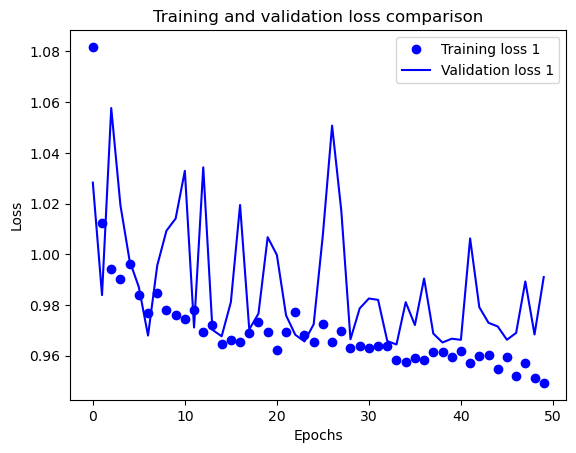

In [203]:
history1_dict = history1.history
loss1 = history1_dict['loss']
val_loss1 = history1_dict['val_loss']

PlotLossComparison(loss1, val_loss1)

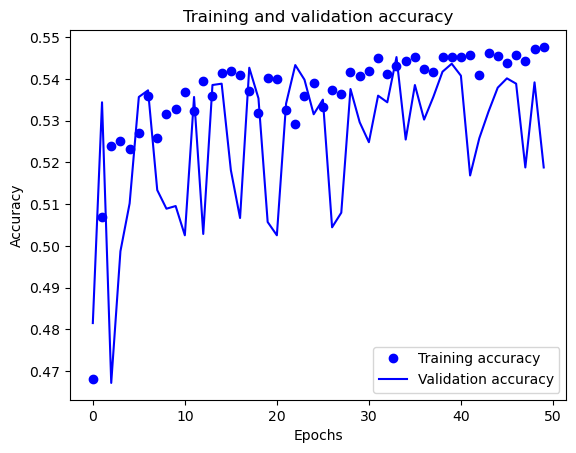

In [204]:
acc1 = history1_dict['accuracy']
val_acc1 = history1_dict['val_accuracy']

PlotAccuracyComparison(acc1, val_acc1)

Teraz nasz model nie przeuczł się za to uzyskał skuteczność na poziomie około 53%, co na pierwszy rzut oka wydaje się słabym wynikiem. Na koniec pokażemy skuteczność bukmacherów, gazet i ludzi, co zmieni nasz punkt widzenia. Celem tego notebook'a będzie uzyskanie skuteczności modelu na poziomie 60%